In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  RandomizedSearchCV

from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor,
                              RandomForestRegressor, ExtraTreesRegressor, StackingRegressor)
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

import xgboost as xgb

In [2]:
test=pd.read_csv('test.csv')
test.head(2)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.2 AMT (105 л.с.),5,1603226273,RUB,2014,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,2017,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 MT (110 л.с.),5,1603226277,RUB,2017,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [3]:
train1=pd.read_csv('all_auto_ru_14_11_2020.csv')
train1.head(2)

,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,start_date,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,price_EUR,price_USD
0,Седан,AUDI,97948F,{'id': '0'},Машина на полном ходу\nСостояние хорошее\nС до...,2.3,133.0,{},бензин,5,359000,1990.0,"{'code': '100', 'name': '100', 'ru_name': '100...",100,2.3 MT (133 л.с.),4.0,2020-11-13T23:31:09Z,RUR,1993,1101578354,"{'id': '7879487', 'displacement': 2309, 'engin...",SEDAN MECHANICAL 2.3,MECHANICAL,EUROPEAN,3.0,NaN,ORIGINAL,передний,LEFT,True,True,106000.0,1161.0,1371.0
1,Седан,AUDI,CACECB,{'id': '0'},Продажа от официального дилера KIA - Компания ...,1.8,90.0,"{'condition': True, 'audiosystem-cd': True, 'f...",бензин,7,204700,1982.0,"{'code': '100', 'name': '100', 'ru_name': '100...",100,1.8 MT (90 л.с.),4.0,2020-11-12T09:13:49Z,RUR,1984,1101559676,"{'id': '20388757', 'displacement': 1781, 'engi...",SEDAN MECHANICAL 1.8,MECHANICAL,EUROPEAN,3.0,NaN,ORIGINAL,передний,LEFT,True,True,44000.0,482.0,569.0


In [4]:
train2=pd.read_csv('data1.csv')
train2.head(2)

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,is_train,price
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2,105.0,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,2013.0,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.2 AMT (105 л.с.),5.0,1603226273,RUB,2014,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,False,0
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6,110.0,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,2017.0,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 MT (110 л.с.),5.0,1603226277,RUB,2017,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,False,0


In [5]:
train3=pd.read_csv('my_train.csv')
train3.head(2)

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,productionDate,model_name,vehicleTransmission,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,car_url
0,седан,a6,чёрный,3.0,218.0,Бензин,215000,2005,audi,автоматическая,3,Оригинал,полный,Левый,Не требует ремонта,Растаможен,545000,https://auto.ru/cars/used/sale/audi/a6/1102441...
1,внедорожник 5 дв.,gx,серебристый,4.7,270.0,Бензин,183226,2005,lexus,автоматическая,3,Дубликат,полный,Левый,Не требует ремонта,Растаможен,1425000,https://auto.ru/cars/used/sale/lexus/gx/110184...


In [6]:
train3.rename(columns={'Владение':'Владельцы'}, inplace=True)

In [7]:
train3.head(2)

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,productionDate,model_name,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price,car_url
0,седан,a6,чёрный,3.0,218.0,Бензин,215000,2005,audi,автоматическая,3,Оригинал,полный,Левый,Не требует ремонта,Растаможен,545000,https://auto.ru/cars/used/sale/audi/a6/1102441...
1,внедорожник 5 дв.,gx,серебристый,4.7,270.0,Бензин,183226,2005,lexus,автоматическая,3,Дубликат,полный,Левый,Не требует ремонта,Растаможен,1425000,https://auto.ru/cars/used/sale/lexus/gx/110184...


# Объединим датасеты и начнем полноценную обработку

In [8]:
df_train1 = train1.copy()
df_train2 = train2.copy()
df_train3=train3.copy()
df_test = test.copy()
df_test['price'] = 0

In [9]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train1['sample'] = 1 # помечаем где у нас трейн
df_train2['sample'] = 1
df_train3['sample'] = 1
df_test['sample'] = 0 # помечаем где у нас тест

In [10]:
frames_to_concat=[df_train1, df_train2, df_train3, df_test]
data=pd.concat(frames_to_concat)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237473 entries, 0 to 34685
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bodyType              237471 non-null  object 
 1   brand                 237473 non-null  object 
 2   color                 237473 non-null  object 
 3   complectation_dict    126495 non-null  object 
 4   description           179364 non-null  object 
 5   engineDisplacement    237418 non-null  object 
 6   enginePower           237471 non-null  object 
 7   equipment_dict        163039 non-null  object 
 8   fuelType              237473 non-null  object 
 9   image                 183031 non-null  object 
 10  mileage               237473 non-null  int64  
 11  modelDate             183029 non-null  float64
 12  model_info            183031 non-null  object 
 13  model_name            237473 non-null  object 
 14  name                  183029 non-null  object 
 15  n

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.describe()

,mileage,modelDate,numberOfDoors,productionDate,price,price_EUR,price_USD,sample,parsing_unixtime
count,231795.000000,181523.000000,181523.000000,231795.000000,2.314990e+05,75647.000000,75647.000000,231795.000000,1.055820e+05
mean,133901.118803,2008.555340,4.507870,2011.228258,1.111057e+06,18753.518011,22147.857007,0.850359,5.489637e+11
std,99792.177876,7.668077,0.676409,6.829998,2.029156e+06,27663.338557,32670.404573,0.356720,7.576730e+11
min,0.000000,1904.000000,0.000000,1904.000000,0.000000e+00,219.000000,259.000000,0.000000,1.603107e+09
25%,60000.000000,2005.000000,4.000000,2008.000000,0.000000e+00,4380.000000,5173.000000,1.000000,1.603238e+09
50%,125000.000000,2010.000000,5.000000,2012.000000,4.950000e+05,8760.000000,10346.000000,1.000000,1.603292e+09
75%,190000.000000,2014.000000,5.000000,2016.000000,1.263000e+06,20685.000000,24429.000000,1.000000,1.599821e+12
max,1000000.000000,2020.000000,5.000000,2020.000000,1.300000e+08,788417.000000,931120.000000,1.000000,1.604714e+12


In [14]:
data.corr()

,mileage,modelDate,numberOfDoors,productionDate,price,price_EUR,price_USD,sample,parsing_unixtime
mileage,1.000000,-0.716473,-0.117390,-0.737579,-0.413436,-0.489995,-0.489995,-0.118159,-0.165940
modelDate,-0.716473,1.000000,0.213392,0.974668,0.400435,0.466775,0.466776,0.093846,0.155480
numberOfDoors,-0.117390,0.213392,1.000000,0.224636,0.093998,0.099599,0.099599,0.040995,0.070028
productionDate,-0.737579,0.974668,0.224636,1.000000,0.404361,0.470953,0.470954,0.120606,0.160377
price,-0.413436,0.400435,0.093998,0.404361,1.000000,1.000000,1.000000,0.229865,0.529271
price_EUR,-0.489995,0.466775,0.099599,0.470953,1.000000,1.000000,1.000000,NaN,NaN
price_USD,-0.489995,0.466776,0.099599,0.470954,1.000000,1.000000,1.000000,NaN,NaN
sample,-0.118159,0.093846,0.040995,0.120606,0.229865,NaN,NaN,1.000000,0.505312
parsing_unixtime,-0.165940,0.155480,0.070028,0.160377,0.529271,NaN,NaN,0.505312,1.000000


In [15]:
data.columns

Index(['bodyType', 'brand', 'color', 'complectation_dict', 'description',
       'engineDisplacement', 'enginePower', 'equipment_dict', 'fuelType',
       'image', 'mileage', 'modelDate', 'model_info', 'model_name', 'name',
       'numberOfDoors', 'start_date', 'priceCurrency', 'productionDate',
       'sell_id', 'super_gen', 'vehicleConfiguration', 'vehicleTransmission',
       'vendor', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние',
       'Таможня', 'price', 'price_EUR', 'price_USD', 'sample', 'car_url',
       'parsing_unixtime', 'is_train'],
      dtype='object')

In [16]:
for i in data.columns:
    print(i, len(data[i].value_counts()))

bodyType 192
brand 975
color 32
complectation_dict 8154
description 95824
engineDisplacement 221
enginePower 734
equipment_dict 81639
fuelType 13
image 70583
mileage 44393
modelDate 75
model_info 2618
model_name 1369
name 4780
numberOfDoors 5
start_date 58524
priceCurrency 2
productionDate 79
sell_id 131649
super_gen 17489
vehicleConfiguration 1137
vehicleTransmission 8
vendor 6
Владельцы 7
Владение 572
ПТС 4
Привод 3
Руль 4
Состояние 2
Таможня 2
price 14215
price_EUR 8973
price_USD 9009
sample 2
car_url 110670
parsing_unixtime 70314
is_train 2


In [17]:
for i in data.columns:
    print(i, len(data[data[i].isna()]))

bodyType 2
brand 0
color 0
complectation_dict 106806
description 53893
engineDisplacement 55
enginePower 2
equipment_dict 70262
fuelType 0
image 50270
mileage 0
modelDate 50272
model_info 50270
model_name 0
name 50272
numberOfDoors 50272
start_date 155852
priceCurrency 50566
productionDate 0
sell_id 50270
super_gen 50272
vehicleConfiguration 50272
vehicleTransmission 2
vendor 50270
Владельцы 15692
Владение 178601
ПТС 451
Привод 2
Руль 0
Состояние 0
Таможня 0
price 296
price_EUR 156148
price_USD 156148
sample 0
car_url 75943
parsing_unixtime 126213
is_train 160899


In [18]:
data.isna().sum()

bodyType                     2
brand                        0
color                        0
complectation_dict      106806
description              53893
engineDisplacement          55
enginePower                  2
equipment_dict           70262
fuelType                     0
image                    50270
mileage                      0
modelDate                50272
model_info               50270
model_name                   0
name                     50272
numberOfDoors            50272
start_date              155852
priceCurrency            50566
productionDate               0
sell_id                  50270
super_gen                50272
vehicleConfiguration     50272
vehicleTransmission          2
vendor                   50270
Владельцы                15692
Владение                178601
ПТС                        451
Привод                       2
Руль                         0
Состояние                    0
Таможня                      0
price                      296
price_EU

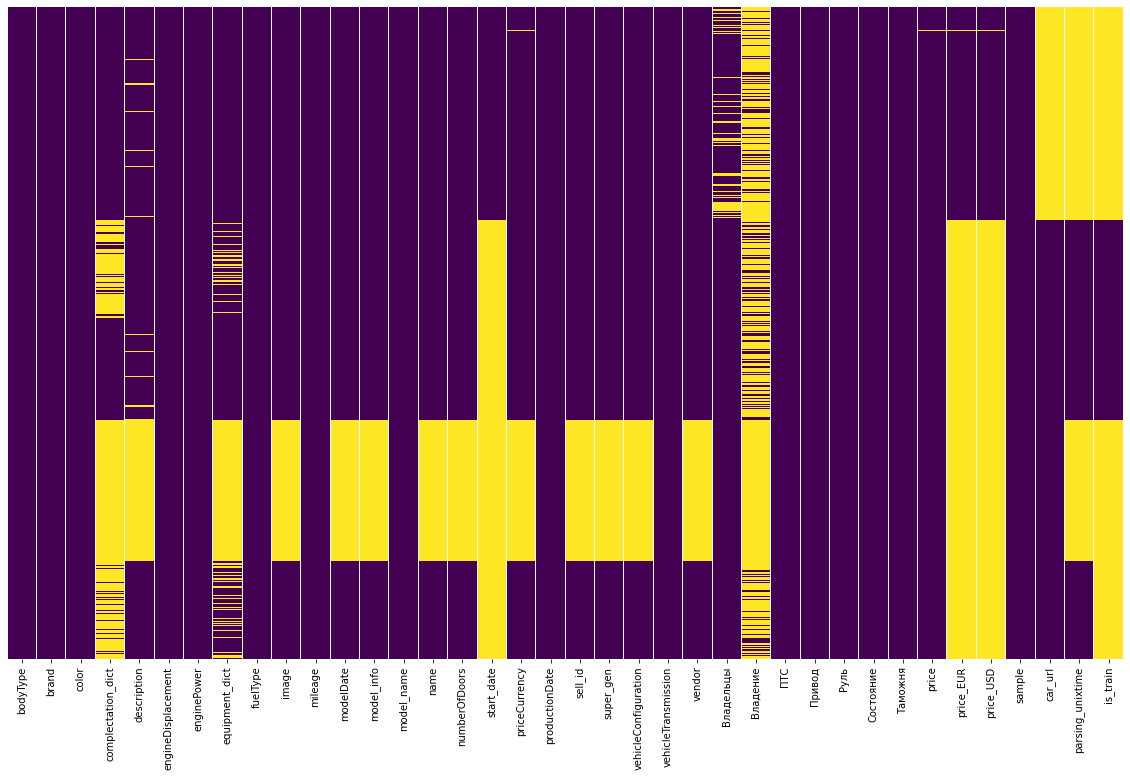

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap=sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Data Preproc

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231795 entries, 0 to 34685
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bodyType              231793 non-null  object 
 1   brand                 231795 non-null  object 
 2   color                 231795 non-null  object 
 3   complectation_dict    124989 non-null  object 
 4   description           177902 non-null  object 
 5   engineDisplacement    231740 non-null  object 
 6   enginePower           231793 non-null  object 
 7   equipment_dict        161533 non-null  object 
 8   fuelType              231795 non-null  object 
 9   image                 181525 non-null  object 
 10  mileage               231795 non-null  int64  
 11  modelDate             181523 non-null  float64
 12  model_info            181525 non-null  object 
 13  model_name            231795 non-null  object 
 14  name                  181523 non-null  object 
 15  n

## bodyType 

In [21]:
data['bodyType'].value_counts()

внедорожник 5 дв.                      59316
седан                                  54332
Внедорожник 5 дв.                      29534
Седан                                  23609
хэтчбек 5 дв.                          13117
                                       ...  
Пикап Полуторная кабина Regular Cab        1
Седан LWB                                  1
Купе SRT8                                  1
Внедорожник 5 дв. L                        1
Универсал 5 дв. California                 1
Name: bodyType, Length: 192, dtype: int64

Заполним пропуски на самое популярное значение

In [22]:
data.bodyType.isna().sum()

2

In [23]:
data.bodyType.fillna(data.bodyType.value_counts().index[0], inplace=True)

In [24]:
data['bodyType'] = data['bodyType'].apply(lambda x: re.findall(r'\w+', x)[0])
data.bodyType=data.bodyType.apply(lambda x: str(x.lower()))

In [25]:
other_cars = [ 'кабриолет', 'родстер', 'фургон','микровэн', 'лимузин', 'тарга', 'фастбек']
data['bodyType'] = data['bodyType'].apply(lambda x: 'другое' if x in other_cars else x )
data['bodyType'] = data['bodyType'].astype('category')

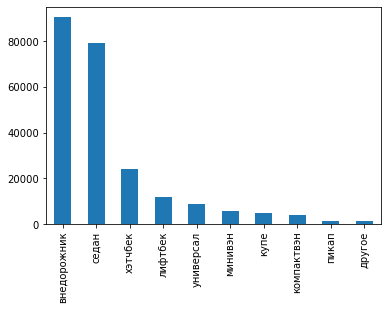

In [26]:
data['bodyType'].value_counts().plot(kind='bar')

##  Brand

In [27]:
data.brand.value_counts()

MERCEDES          21907
BMW               18683
VOLKSWAGEN        18307
NISSAN            16883
TOYOTA            14554
                  ...  
insignia_opc          1
karma                 1
pixo                  1
corolla_rumion        1
7_crossback           1
Name: brand, Length: 975, dtype: int64

In [28]:
data.brand=data.brand.apply(lambda x: x.lower())

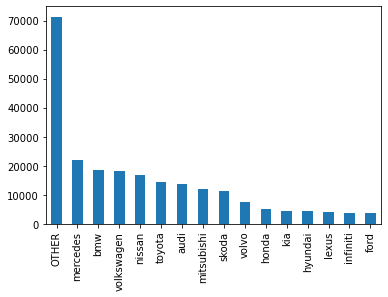

In [29]:
brand_list = list(data.brand.value_counts()[:15].keys())
data.brand = data.brand.apply(lambda x: x if x in brand_list else 'OTHER')
data.brand = data.brand.astype('category')
data.brand.value_counts().plot(kind='bar')

## color 

In [30]:
data.color.value_counts()

чёрный         47775
белый          30183
серый          23328
040001         21185
синий          14366
серебристый    13997
FAFBFB         13330
97948F          9578
CACECB          8767
0000CC          8135
красный         7193
коричневый      5526
EE1D19          4214
зелёный         3831
200204          3103
бежевый         2504
007F00          2200
голубой         1955
C49648          1700
золотистый      1688
22A0F8          1155
фиолетовый      1111
жёлтый           797
оранжевый        787
пурпурный        770
FFD600           599
DEA522           545
660099           541
FF8649           465
4A2197           406
розовый           41
FFC0CB            20
Name: color, dtype: int64

In [31]:
colors = {
'040001':'черный',
'FAFBFB':'белый',
'97948F':'серый',
'CACECB':'серебристый',
'0000CC':'синий',
'EE1D19':'красный',
'200204':'бордовый',
'007F00':'зелёный',
'C49648':'коричневый',
'22A0F8':'голубой',
'DEA522':'золотистый',
'FFD600':'жёлтый',
'660099':'пурпурный',
'4A2197':'фиолетовый',
'FF8649':'бежевый',
'FFC0CB':'розовый',
}

In [32]:
data.color = data.color.replace(colors).apply(lambda x: x.lower())

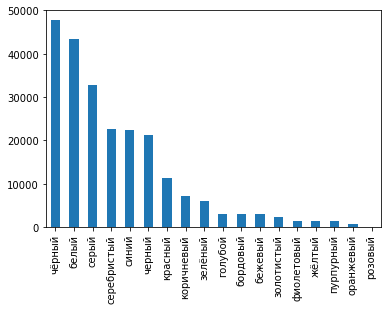

In [33]:
data.color = data.color.astype("category")
data.color.value_counts().plot(kind='bar')

## complectation_dict 

In [34]:
data.complectation_dict.isna().sum()

106806

 много пропусков

## engineDisplacement 

In [35]:
data.engineDisplacement.value_counts()

2.0          27297
1.6          25186
1.6          15563
2.0          14942
3.0          10925
             ...  
8.2              1
7.7              1
3.9 LTR          1
универсал        1
6.7d             1
Name: engineDisplacement, Length: 221, dtype: int64

In [36]:
data.engineDisplacement.isna().sum()

55

In [37]:
data.engineDisplacement.fillna(data.engineDisplacement.value_counts().index[0], inplace=True)

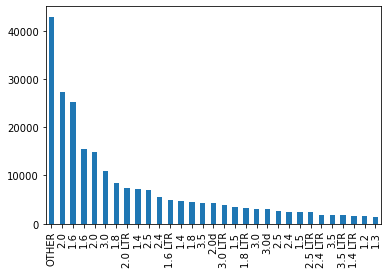

In [38]:
engine_list = list(data.engineDisplacement.value_counts()[:30].keys())
data.engineDisplacement = data.engineDisplacement.apply(lambda x: x if x in engine_list else 'OTHER')
data.engineDisplacement.value_counts().plot(kind='bar')

## enginePower 

In [39]:
data.enginePower.value_counts()

150.0      15142
249.0       9949
140.0       5459
110.0       5140
105.0       4852
           ...  
341.0          1
44 N12         1
32 N12         1
485 N12        1
11.0           1
Name: enginePower, Length: 734, dtype: int64

In [40]:
data.enginePower.isna().sum()
data.enginePower.fillna(data.enginePower.value_counts().index[0], inplace=True)


In [41]:
data.enginePower = data.enginePower.apply(lambda x: int(re.findall('(\d+)', str(x))[0]))
data.enginePower = data.enginePower.astype('int')

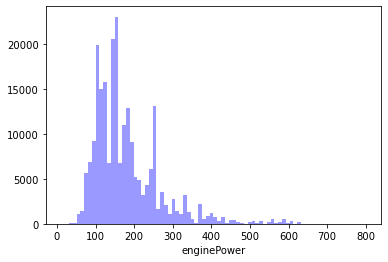

In [42]:
sns.distplot(data.enginePower, kde = False, rug=False, color='b', bins=80)

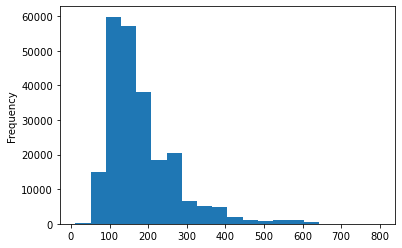

In [43]:
data.enginePower.sort_values().plot.hist(bins=20)

## fuelType 

In [44]:
data.fuelType.value_counts()

бензин                                149327
Бензин                                 42599
дизель                                 30918
Дизель                                  6916
гибрид                                   983
Бензин, газобаллонное оборудование       501
электро                                  262
Гибрид                                   232
газ                                       33
Газ                                       14
Газ, газобаллонное оборудование            8
минивэн                                    1
универсал                                  1
Name: fuelType, dtype: int64

In [45]:
fuel = {'бензин':'petrol',
'Бензин':'petrol',
'дизель':'diesel',
'Дизель':'diesel',
       'гибрид':'hybrid',
       'Гибрид':'hybrid',
       'электро':'elect',
       'газ':'gas', 'Газ':'gas', 'Бензин, газобаллонное оборудование':'petrol',
       'Газ, газобаллонное оборудование':'gas'}
data.fuelType = data.fuelType.replace(fuel)

In [46]:
data.fuelType.value_counts()

petrol       192427
diesel        37834
hybrid         1215
elect           262
gas              55
минивэн           1
универсал         1
Name: fuelType, dtype: int64

In [47]:
fuel_list = list(data.fuelType.value_counts()[:5].keys())
data.fuelType = data.fuelType.apply(lambda x: x if x in fuel_list else 'petrol')

In [48]:
data.fuelType.value_counts()

petrol    192429
diesel     37834
hybrid      1215
elect        262
gas           55
Name: fuelType, dtype: int64

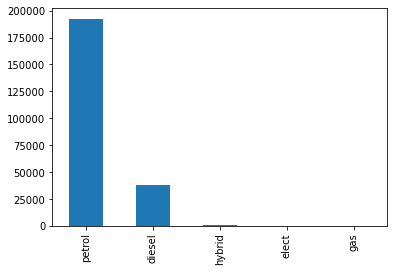

In [49]:
data.fuelType = data.fuelType.astype('category')
data.fuelType.value_counts().plot(kind='bar')

## mileage 

In [50]:
data.mileage.value_counts()

0         22308
200000     2407
150000     2207
180000     1940
250000     1805
          ...  
195430        1
174956        1
148337        1
156533        1
201498        1
Name: mileage, Length: 44393, dtype: int64

In [51]:
data.mileage.isna().sum()

0

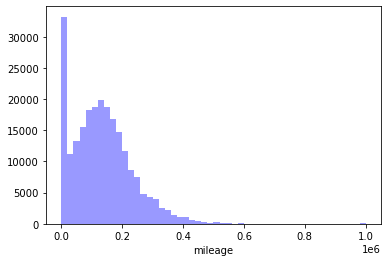

In [52]:
sns.distplot(data.mileage, kde = False, rug=False, color='b')

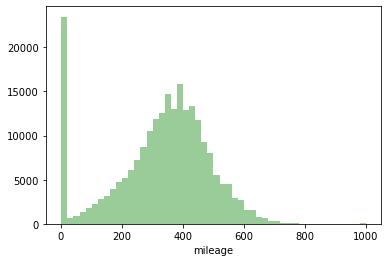

In [53]:
data.mileage=data.mileage.apply(lambda x: np.sqrt(x+1))
sns.distplot(data.mileage, kde = False, rug=False, color='g')

## modelDate 

In [54]:
data.modelDate.value_counts()

2010.0    11873
2006.0    10723
2009.0     9962
2013.0     9861
2012.0     9658
          ...  
1957.0        1
1952.0        1
1948.0        1
1942.0        1
1908.0        1
Name: modelDate, Length: 75, dtype: int64

In [55]:
data.modelDate.isna().sum()

50272

In [56]:
data.modelDate.fillna(data.modelDate.value_counts().index[0], inplace=True)


In [57]:
#data.modelDate=data[data.modelDate < 10]['modelDate'].apply(lambda x: np.exp(x))

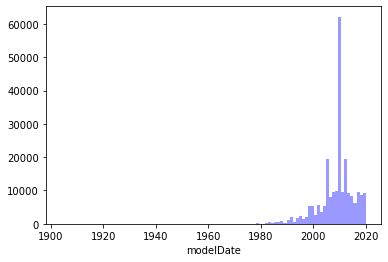

In [58]:
sns.distplot(data.modelDate, kde = False, rug=False, color='b', bins=100)

## model_name 

In [59]:
data.model_name.value_counts().head(20)

OCTAVIA       5342
vaz           5200
kia           4330
hyundai       3775
E_KLASSE      3367
POLO          3344
toyota        3304
volkswagen    3178
LANCER        3074
PASSAT        3019
5ER           2959
OUTLANDER     2916
mercedes      2847
bmw           2815
A6            2778
X5            2732
3ER           2724
nissan        2706
QASHQAI       2692
A4            2619
Name: model_name, dtype: int64

In [60]:
data.model_name.isna().sum()

0

In [61]:
data.model_name=data.model_name.apply(lambda x: x.lower())

In [62]:
data.model_name.value_counts()


octavia      5342
vaz          5200
kia          4330
hyundai      3775
e_klasse     3367
             ... 
foton           1
wc              1
viper           1
x3 m            1
megane_rs       1
Name: model_name, Length: 1365, dtype: int64

In [63]:
df_test.model_name.value_counts()

OCTAVIA     1418
5ER         1026
LANCER       855
E_KLASSE     809
PASSAT       782
            ... 
TARO           1
POLO_GTI       1
OTTI           1
E3             1
PASEO          1
Name: model_name, Length: 544, dtype: int64

In [64]:
df_test.model_name = df_test.model_name.apply(lambda x: x.lower())

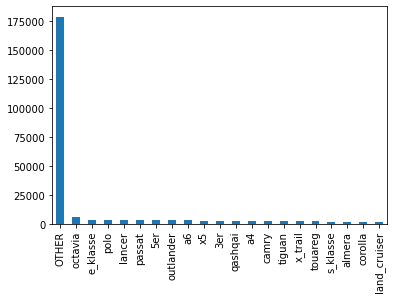

In [65]:
model_name_list = list(df_test['model_name'].value_counts()[:20].keys())
data['model_name'] = data['model_name'].apply(lambda x: x if x in model_name_list else 'OTHER')
data['model_name'] = data['model_name'].astype('category')
data['model_name'].value_counts().plot(kind='bar')

## Name 

In [66]:
data.name.value_counts()

1.6 AT (110 л.с.)        2889
2.0 AT (150 л.с.)        1784
1.6 MT (110 л.с.)        1717
1.6 MT (102 л.с.)        1651
1.4 AMT (150 л.с.)       1534
                         ... 
3.0 MT (245 л.с.) 4WD       1
4.0 AT (178 л.с.) 4WD       1
1.6d AMT (90 л.с.)          1
1.8 MT (88 л.с.) 4WD        1
2.4d MT (82 л.с.) 4WD       1
Name: name, Length: 4780, dtype: int64

In [67]:
data.name.isna().sum()

50272

## numberOfDoors 

In [68]:
data.numberOfDoors.value_counts()

5.0    106001
4.0     66729
2.0      5006
3.0      3783
0.0         4
Name: numberOfDoors, dtype: int64

In [69]:
data.numberOfDoors.isna().sum()

50272

In [70]:
data.numberOdDoors=data.numberOfDoors.fillna(data.numberOfDoors.value_counts().index[0], inplace=True)


In [71]:
doors_list = list(data.numberOfDoors.value_counts()[:3].keys())
data.numberOfDoors = data.numberOfDoors.apply(lambda x: x if x in doors_list else 5.0)

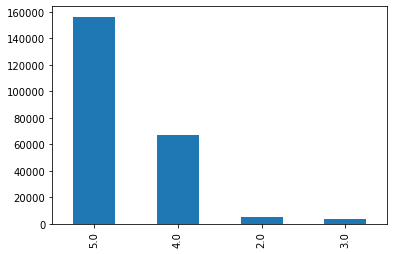

In [72]:
data.numberOfDoors.value_counts().plot(kind='bar')

## productionDate 

In [73]:
data.productionDate.value_counts()

2020    26047
2012    16150
2008    15956
2011    15285
2013    14802
        ...  
1928        1
1927        1
1943        1
1956        1
1923        1
Name: productionDate, Length: 79, dtype: int64

In [74]:
data.productionDate.isna().sum()

0

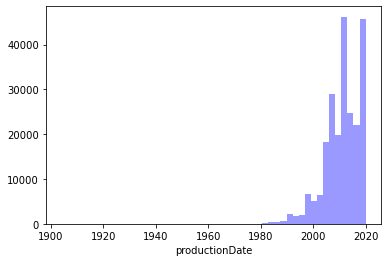

In [75]:
sns.distplot(data['productionDate'], kde = False, rug=False, color='b', bins=50)

## vehicleConfiguration 

In [76]:
data.vehicleConfiguration.value_counts()

ALLROAD_5_DOORS AUTOMATIC 2.0     9078
ALLROAD_5_DOORS AUTOMATIC 3.0     8833
SEDAN AUTOMATIC 2.0               7899
SEDAN MECHANICAL 1.6              7048
ALLROAD_5_DOORS VARIATOR 2.0      6978
                                  ... 
ALLROAD_5_DOORS AUTOMATIC 6.5d       1
LIFTBACK AUTOMATIC 2.9               1
PICKUP_ONE MECHANICAL 4.9            1
SEDAN AUTOMATIC 3.9d                 1
HATCHBACK_5_DOORS ROBOT 0.8          1
Name: vehicleConfiguration, Length: 1137, dtype: int64

In [77]:
data.vehicleConfiguration.isna().sum()

50272

## vehicleTransmission 

In [78]:
data.vehicleTransmission.isna().sum()

2

In [79]:
data.vehicleTransmission.value_counts()

автоматическая      82854
AUTOMATIC           42072
механическая        39336
MECHANICAL          21170
роботизированная    16944
вариатор            16718
ROBOT                7335
VARIATOR             5364
Name: vehicleTransmission, dtype: int64

In [80]:
vehicle = {'AUTOMATIC':'автоматическая',
'MECHANICAL':'механическая',
'ROBOT':'роботизированная',
'VARIATOR':'вариатор'}
data.vehicleTransmission = data.vehicleTransmission.replace(vehicle)

In [81]:
data.vehicleTransmission.fillna('автоматическая', inplace=True)

In [82]:
data.vehicleTransmission.value_counts()

автоматическая      124928
механическая         60506
роботизированная     24279
вариатор             22082
Name: vehicleTransmission, dtype: int64

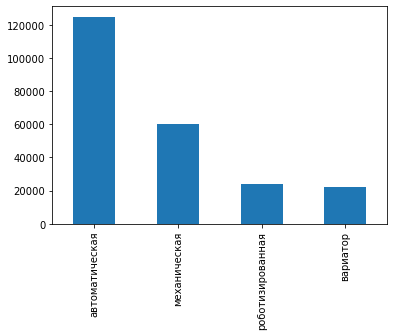

In [83]:
data.vehicleTransmission = data.vehicleTransmission.astype('category')
data.vehicleTransmission.value_counts().plot.bar()

## vendor 

In [84]:
data.vendor.value_counts()

EUROPEAN    102411
JAPANESE     59907
KOREAN        9710
AMERICAN      7389
RUSSIAN       1061
CHINESE       1047
Name: vendor, dtype: int64

In [85]:
data.vendor.isna().sum()

50270

In [86]:
data.vendor=data.vendor.fillna(data.vendor.describe().top)

In [87]:
data.vendor.value_counts()

EUROPEAN    152681
JAPANESE     59907
KOREAN        9710
AMERICAN      7389
RUSSIAN       1061
CHINESE       1047
Name: vendor, dtype: int64

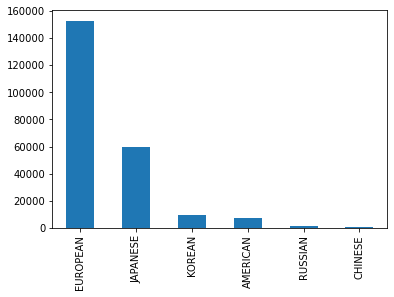

In [88]:
data.vendor.value_counts().plot.bar()
data.vendor = data.vendor.astype('category')

## Владельцы 

In [89]:
data['Владельцы'].value_counts()

3 или более    45035
3.0            44515
1.0            37989
2.0            28017
1 владелец     27656
2 владельца    26271
Неизвестно      6620
Name: Владельцы, dtype: int64

In [90]:
data['Владельцы'].isna().sum()

15692

In [91]:
data['Владельцы'] = data['Владельцы'].fillna(data['Владельцы'].describe().top)

In [92]:
data['Владельцы'] = data['Владельцы'].replace('Неизвестно','3')

In [93]:
data['Владельцы'].value_counts()

3 или более    60727
3.0            44515
1.0            37989
2.0            28017
1 владелец     27656
2 владельца    26271
3               6620
Name: Владельцы, dtype: int64

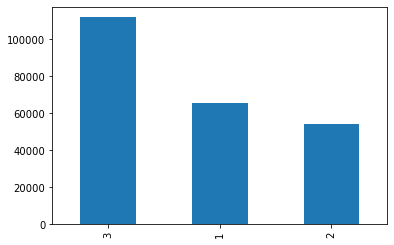

In [94]:
data['Владельцы'] = data['Владельцы'].apply(lambda x: int(re.findall('\d', str(x))[0]))
data['Владельцы'] = data['Владельцы'].astype('category')
data['Владельцы'].value_counts().plot(kind='bar')


## Владение 

In [95]:
data['Владение'].value_counts()

{'year': 2019, 'month': 8}     501
{'year': 2018, 'month': 11}    501
{'year': 2018, 'month': 10}    488
{'year': 2018, 'month': 12}    482
{'year': 2020, 'month': 1}     450
                              ... 
{'year': 1994, 'month': 3}       1
{'year': 1996, 'month': 8}       1
{'year': 1996, 'month': 5}       1
{'year': 2003, 'month': 2}       1
{'year': 2003, 'month': 1}       1
Name: Владение, Length: 572, dtype: int64

## ПТС 

In [96]:
data['ПТС'].value_counts()

Оригинал     137639
ORIGINAL      67399
Дубликат      18212
DUPLICATE      8094
Name: ПТС, dtype: int64

In [97]:
data['ПТС'].isna().sum()

451

In [98]:
data['ПТС'].fillna('Оригинал', inplace=True)

In [99]:
PTS = {'ORIGINAL':'Оригинал',
'DUPLICATE':'Дубликат'}
data['ПТС'] = data['ПТС'].replace(PTS)
data['ПТС'].value_counts()

Оригинал    205489
Дубликат     26306
Name: ПТС, dtype: int64

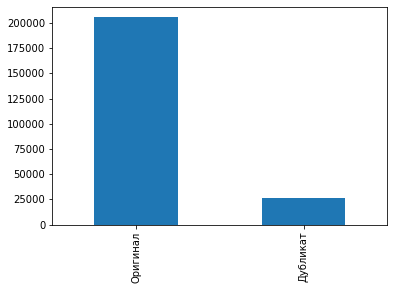

In [100]:
data['ПТС'].value_counts().plot(kind='bar')

In [101]:
data['ПТС'] = data['ПТС'].astype('category')

## Привод 

In [102]:
data['Привод'].value_counts()

передний    114050
полный       98433
задний       19310
Name: Привод, dtype: int64

In [103]:
data['Привод'].isna().sum()

2

In [104]:
data['Привод'] = data['Привод'].fillna(data['Привод'].describe().top)

In [105]:
data['Привод'].value_counts()

передний    114052
полный       98433
задний       19310
Name: Привод, dtype: int64

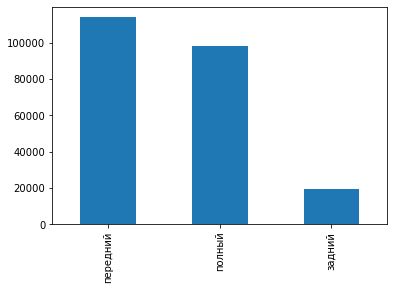

In [106]:
data['Привод'] = data['Привод'].astype('category')
data['Привод'].value_counts().plot(kind='bar')

## Руль 

In [107]:
data['Руль'].value_counts()

Левый     151160
LEFT       74543
Правый      4692
RIGHT       1400
Name: Руль, dtype: int64

In [108]:
wheel = {'LEFT':'Левый',
'RIGHT':'Правый'}
data['Руль'] = data['Руль'].replace(wheel)

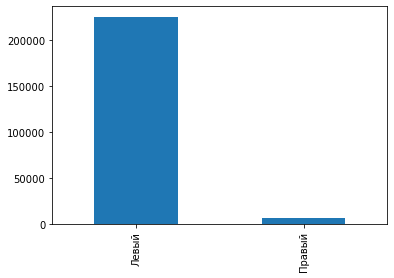

In [109]:
data['Руль'] = data['Руль'].astype('category')
data['Руль'].value_counts().plot(kind='bar')

## Состояние 

In [110]:
data['Состояние'].value_counts()

Не требует ремонта    155852
True                   75943
Name: Состояние, dtype: int64

In [111]:
condition = {'Не требует ремонта':'True'}
data['Состояние'] = data['Состояние'].replace(condition)

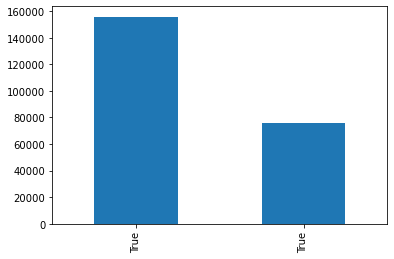

In [112]:
data['Состояние'].value_counts().plot(kind='bar')

## Таможня 

In [113]:
data['Таможня'].value_counts()

Растаможен    155852
True           75943
Name: Таможня, dtype: int64

## priceCurrency 

In [114]:
data.priceCurrency.value_counts()

RUR    111857
RUB     69372
Name: priceCurrency, dtype: int64

## price 

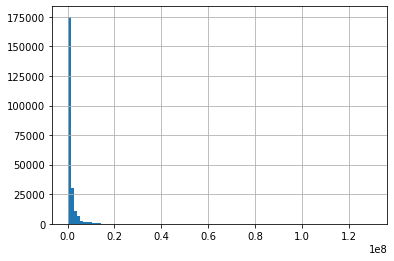

In [115]:
data.price.hist(bins=100)

In [116]:
data.price.isna().sum()

296

In [117]:
data.price.fillna(data.price.median(), inplace=True)
data.price.isna().sum()

0

In [118]:
data.price.value_counts()

0.0           69372
450000.0       1403
650000.0       1354
550000.0       1324
350000.0       1311
              ...  
7270213.0         1
1817582.0         1
4474000.0         1
3037844.0         1
10357000.0        1
Name: price, Length: 14215, dtype: int64

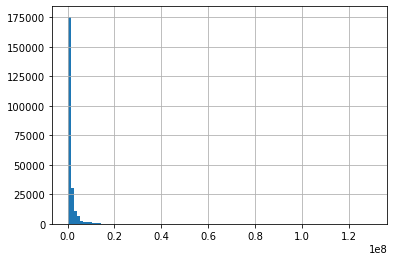

In [119]:
data.price.hist(bins=100)


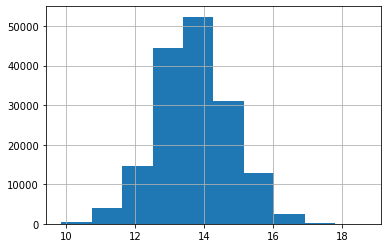

In [120]:
data[data.price != 0].price.apply(lambda x: np.log(x)).hist()

# Добавим признаков

In [121]:
brand_list

['mercedes',
 'bmw',
 'volkswagen',
 'nissan',
 'toyota',
 'audi',
 'mitsubishi',
 'skoda',
 'volvo',
 'honda',
 'kia',
 'hyundai',
 'lexus',
 'infiniti',
 'ford']

In [122]:
data['Элитный'] = data.brand.apply(lambda x: 1 if x in brand_list else 0)

# Выходим на финишную прямую по обработке

В комплектации и владении слишком много пропусков, избавимся от колонок этих

In [123]:
data.columns

Index(['bodyType', 'brand', 'color', 'complectation_dict', 'description',
       'engineDisplacement', 'enginePower', 'equipment_dict', 'fuelType',
       'image', 'mileage', 'modelDate', 'model_info', 'model_name', 'name',
       'numberOfDoors', 'start_date', 'priceCurrency', 'productionDate',
       'sell_id', 'super_gen', 'vehicleConfiguration', 'vehicleTransmission',
       'vendor', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние',
       'Таможня', 'price', 'price_EUR', 'price_USD', 'sample', 'car_url',
       'parsing_unixtime', 'is_train', 'Элитный'],
      dtype='object')

In [124]:
data.drop(['complectation_dict', 'Владение', 'car_url', 'description', 'modelDate',
          'equipment_dict','image','parsing_unixtime', 'priceCurrency','sell_id', 'super_gen', 'vehicleConfiguration',
         'start_date', 'price_EUR', 'price_USD', 'is_train','Состояние','Таможня','Владельцы','model_info','name' ], axis=1, inplace=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231795 entries, 0 to 34685
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   bodyType             231795 non-null  category
 1   brand                231795 non-null  category
 2   color                231795 non-null  category
 3   engineDisplacement   231795 non-null  object  
 4   enginePower          231795 non-null  int32   
 5   fuelType             231795 non-null  category
 6   mileage              231795 non-null  float64 
 7   model_name           231795 non-null  category
 8   numberOfDoors        231795 non-null  float64 
 9   productionDate       231795 non-null  int64   
 10  vehicleTransmission  231795 non-null  category
 11  vendor               231795 non-null  category
 12  ПТС                  231795 non-null  category
 13  Привод               231795 non-null  category
 14  Руль                 231795 non-null  category
 15  p

In [126]:
data.head(2)

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,model_name,numberOfDoors,productionDate,vehicleTransmission,vendor,ПТС,Привод,Руль,price,sample,Элитный
0,седан,audi,серый,OTHER,133,petrol,599.166922,OTHER,4.0,1993,механическая,EUROPEAN,Оригинал,передний,Левый,106000.0,1,1
1,седан,audi,серебристый,1.8,90,petrol,452.438946,OTHER,4.0,1984,механическая,EUROPEAN,Оригинал,передний,Левый,44000.0,1,1


In [127]:
#data.drop(['model_info','name','modelDate','Владельцы'],axis=1, inplace=True)

In [128]:
for colum in ['bodyType', 'brand', 'color', 'engineDisplacement', 'fuelType', 'model_name', 'vehicleTransmission', 'vendor', 'Привод','ПТС','Руль','Элитный']:
    data[colum] = data[colum].astype('category').cat.codes

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231795 entries, 0 to 34685
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bodyType             231795 non-null  int8   
 1   brand                231795 non-null  int8   
 2   color                231795 non-null  int8   
 3   engineDisplacement   231795 non-null  int8   
 4   enginePower          231795 non-null  int32  
 5   fuelType             231795 non-null  int8   
 6   mileage              231795 non-null  float64
 7   model_name           231795 non-null  int8   
 8   numberOfDoors        231795 non-null  float64
 9   productionDate       231795 non-null  int64  
 10  vehicleTransmission  231795 non-null  int8   
 11  vendor               231795 non-null  int8   
 12  ПТС                  231795 non-null  int8   
 13  Привод               231795 non-null  int8   
 14  Руль                 231795 non-null  int8   
 15  price             

In [130]:
data.corr()

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,model_name,numberOfDoors,productionDate,vehicleTransmission,vendor,ПТС,Привод,Руль,price,sample,Элитный
bodyType,1.000000,-0.054770,-0.004793,-0.222868,-0.314189,0.230794,0.220098,-0.128769,-0.351881,-0.237179,0.195624,-0.086624,-0.102884,-0.581272,0.071304,-0.235613,-0.011362,-0.045134
brand,-0.054770,1.000000,0.006340,0.079669,-0.037657,-0.019083,0.056253,0.384447,-0.129409,-0.088591,0.006779,0.278591,0.005587,0.000701,0.090091,-0.058000,-0.226496,0.725970
color,-0.004793,0.006340,1.000000,0.085914,0.145943,-0.055477,0.065463,0.022754,-0.028657,-0.083083,-0.086918,-0.006614,-0.045891,0.061465,-0.028782,0.048648,-0.021547,0.057633
engineDisplacement,-0.222868,0.079669,0.085914,1.000000,0.453267,-0.210870,0.026182,0.007559,-0.079574,-0.105839,-0.264235,0.050696,-0.045400,0.226976,0.003205,0.179536,-0.309034,0.201984
enginePower,-0.314189,-0.037657,0.145943,0.453267,1.000000,-0.106313,-0.175301,-0.012179,-0.033408,0.180835,-0.388204,-0.087594,-0.003609,0.371761,-0.075169,0.450543,-0.045212,0.160191
fuelType,0.230794,-0.019083,-0.055477,-0.210870,-0.106313,1.000000,0.072933,0.013945,-0.105791,-0.128715,0.175635,0.055485,-0.055392,-0.260775,0.027080,-0.210539,0.005231,-0.060574
mileage,0.220098,0.056253,0.065463,0.026182,-0.175301,0.072933,1.000000,0.007842,-0.120781,-0.739104,0.033913,0.058886,-0.248341,-0.196194,0.123509,-0.530941,-0.137519,0.040687
model_name,-0.128769,0.384447,0.022754,0.007559,-0.012179,0.013945,0.007842,1.000000,0.033655,0.028861,0.024419,0.045359,0.026672,0.070382,-0.058007,-0.074750,-0.121253,0.285216
numberOfDoors,-0.351881,-0.129409,-0.028657,-0.079574,-0.033408,-0.105791,-0.120781,0.033655,1.000000,0.240652,0.005004,-0.025929,0.105113,0.338692,-0.050575,0.093505,0.108725,-0.276608
productionDate,-0.237179,-0.088591,-0.083083,-0.105839,0.180835,-0.128715,-0.739104,0.028861,0.240652,1.000000,-0.057227,-0.063545,0.285899,0.254545,-0.230567,0.404186,0.120606,-0.104134


In [131]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 20))
# ax = sns.heatmap(data.loc[:, ['bodyType', 'brand', 'color', 'engineDisplacement',
#                             'enginePower', 'fuelType', 'mileage','model_name',
#                            'numberOfDoors', 'productionDate','vehicleConfiguration',
#                            'vehicleTransmission', 'vendor','Владельцы','ПТС','Привод',
#                            'Руль','price']].corr(method = 'spearman'), annot=True, cmap='coolwarm', linewidth=0.1)

In [132]:
data.columns

Index(['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower',
       'fuelType', 'mileage', 'model_name', 'numberOfDoors', 'productionDate',
       'vehicleTransmission', 'vendor', 'ПТС', 'Привод', 'Руль', 'price',
       'sample', 'Элитный'],
      dtype='object')

In [133]:
data.isna().sum()

bodyType               0
brand                  0
color                  0
engineDisplacement     0
enginePower            0
fuelType               0
mileage                0
model_name             0
numberOfDoors          0
productionDate         0
vehicleTransmission    0
vendor                 0
ПТС                    0
Привод                 0
Руль                   0
price                  0
sample                 0
Элитный                0
dtype: int64

In [134]:
# from sklearn.preprocessing import MinMaxScaler

In [135]:
# scaler=MinMaxScaler()

In [136]:
# num_cols=[]
# num_cols +=['price','mileage']

In [137]:
#data[num_cols] = scaler.fit_transform(data[num_cols].values)

# Готовим модель

In [138]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [139]:
RANDOM_SEED = 42
VAL_SIZE = 0.2


In [140]:
data=data[data.price>0]


In [141]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [142]:
X = train_data.drop(['price'], axis = 1).values
X_test = test_data.drop(['price'], axis = 1).values

In [143]:
y = train_data['price'].values 

In [144]:
train_data.price.value_counts()

450000.0     1403
650000.0     1354
550000.0     1324
350000.0     1311
250000.0     1163
             ... 
1851599.0       1
3702800.0       1
523700.0        1
8866000.0       1
2097200.0       1
Name: price, Length: 14214, dtype: int64

In [145]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED)

In [146]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((129938, 16), (32485, 16), (129938,), (32485,))

 # RandomForest

In [147]:
# A: пар-ры леса по умолчанию
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
test_predict = rf.predict(X_val)
print(f"Test MAPE: {mape(y_val, test_predict)*100:0.3f}%")

Test MAPE: 14.330%


In [148]:
rf = RandomForestRegressor(
 n_estimators=300, 
 min_samples_split=2,
 min_samples_leaf=1,
 max_features=10,
 max_depth=77,
 bootstrap=True, 
 random_state=42)

rf.fit(X_train, y_train)
test_predict = rf.predict(X_val)
print(f"Test MAPE: {mape(y_val, test_predict)*100:0.4f}%")

Test MAPE: 14.0522%


In [149]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# # Посмотрим, какие гиперпараметры нам предлагают как оптимальные:
# rf_random.best_params_

In [150]:
rf = RandomForestRegressor(
 n_estimators=1600, 
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=7,
 bootstrap=False, 
 random_state=42)

rf.fit(X_train, y_train)
test_predict = rf.predict(X_val)
print(f"Test MAPE: {mape(y_val, test_predict)*100:0.4f}%")

Test MAPE: 41.2746%


# extraTree

In [151]:
rf = ExtraTreesRegressor(n_estimators=300, random_state=0, n_jobs=-1,
                         bootstrap=True, verbose=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print(f'Mean Absolute Percentage Error: {(mape(y_val, y_pred))*100:0.2f}%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.5s


Mean Absolute Percentage Error: 14.43%


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.8s finished


# GradientBoosting

In [152]:
gb = GradientBoostingRegressor(max_depth=7,n_estimators=1500,learning_rate=0.1,random_state=42)#
gb.fit(X_train, y_train)
test_predict = gb.predict(X_val)
print(f"GradientBoostingRegressor Test MAPE: {mape(y_val, test_predict)*100:0.3f}%")

GradientBoostingRegressor Test MAPE: 14.447%


# Catboost

In [153]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         #cat_features=cat_features_ids,
         eval_set=(X_val, y_val),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

#model.save_model('catboost_single_model_baseline.model')

predict = model.predict(X_val)
print(f"Точность модели по метрике MAPE: {(mape(y_val, predict))*100:0.2f}%")

Точность модели по метрике MAPE: 16.98%


In [154]:
# from sklearn.model_selection import GridSearchCV
# params = {'iterations'     : [1000,2000,3000,4000,5000],
#           'learning_rate'  : [0.25, 0.5, 0.75,1]}
# model = CatBoostRegressor(random_seed = RANDOM_SEED,
#                           eval_metric='MAPE',
#                           custom_metric=['R2', 'MAE'],
#                           silent=True,)

# grid = GridSearchCV(model, params,cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)

In [155]:
# model = CatBoostRegressor(iterations = 1000,
#                           random_seed = RANDOM_SEED,
#                           eval_metric='MAPE',
#                           custom_metric=['R2', 'MAE'],
#                           silent=True,
#                           learning_rate=0.25,
#                          )
# model.fit(X_train, y_train,
#          eval_set=(X_val, y_val),
#          verbose_eval=0,
#          use_best_model=True,
#          )

# predict = model.predict(X_val)
# print(f"Точность модели по метрике MAPE: {(mape(y_val, predict))*100:0.2f}%")

# XGB

In [156]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=1000, nthread = -1)
model_xgb.fit(X_train, y_train)
test_predict = model_xgb.predict(X_val)
print(f"Test MAPE: {mape(y_val, test_predict)*100:0.3f}%")

Test MAPE: 15.073%


In [157]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
GBoost = GradientBoostingRegressor(n_estimators=1000, random_state =42)
model_xgb = xgb.XGBRegressor(n_estimators=1000, nthread = -1)
RF = RandomForestRegressor(random_state=RANDOM_SEED)

estimators = [
    ('rf', RF),
    ('gb',GBoost),
    ('xgb',model_xgb)
]

s_reg = StackingRegressor(estimators=estimators)
s_reg.fit(X_train, y_train)

test_predict = s_reg.predict(X_val)


print(f"Test MAPE: {mape(y_val, test_predict)*100:0.3f}%")

Test MAPE: 4098500.839%


In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
estimators = [
    ('cb',model),
    ('rf',RandomForestRegressor(random_state=RANDOM_SEED))
]
reg = StackingRegressor(estimators=estimators)
reg.fit(X_train, np.log(y_train))
predict_test = reg.predict(X_val)
predict_test = np.exp(predict_test)
print(f"Точность модели по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 13.01%


In [159]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(min_samples_split=2, learning_rate=0.003, max_depth=15, n_estimators=1000)
gb.fit(X_train, np.log(y_train))
predict_test = np.exp(gb.predict(X_val))
print(f"Точность модели по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 14.10%


In [160]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(min_samples_split=2, learning_rate=0.003, max_depth=15, n_estimators=5000)
gb.fit(X_train, np.log(y_train))
predict_test = np.exp(gb.predict(X_val))
print(f"Точность модели по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 12.76%


# AdaBoost

In [161]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
test_predict = ada.predict(X_val)
print(f"Test MAPE: {mape(y_val, test_predict)*100:0.3f}%")

Test MAPE: 325.315%


# Оценка по семи моделям по умолчанию и подобранными

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
ada=AdaBoostRegressor(random_state=42)
model_xgb = xgb.XGBRegressor(n_estimators=1000, nthread = -1)
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
estimators = [
    ('cb',model),
    ('rf',RandomForestRegressor(random_state=RANDOM_SEED)),
    ('xgb', model_xgb),
    ('lr', LinearRegression(normalize = True)),
    ('kn', KNeighborsRegressor()),
    ('etr', ExtraTreesRegressor(random_state = RANDOM_SEED)), 
    ('abr', AdaBoostRegressor(random_state = RANDOM_SEED))
    
]
reg = StackingRegressor(estimators=estimators)
reg.fit(X_train, np.log(y_train))
predict_test = reg.predict(X_val)
predict_test = np.exp(predict_test)
print(f"Точность модели по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 12.49%


In [163]:
# from sklearn.model_selection import GridSearchCV

# params = {'iterations'     : [1000,2000,3000,4000,5000],
#           'learning_rate'  : [0.25, 0.5, 0.75,1]}
# model = CatBoostRegressor(random_seed = RANDOM_SEED,
#                           eval_metric='MAPE',
#                           custom_metric=['R2', 'MAE'],
#                           silent=True,)

# grid = GridSearchCV(model, params,cv = 2, n_jobs=-1)
# grid.fit(X_train,y_train)
# grid.best_params_

In [164]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_random.best_params_

In [165]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import StackingRegressor
# ada=AdaBoostRegressor(random_state=42)
# model_xgb = xgb.XGBRegressor(n_estimators=1000, nthread = -1)
# model = CatBoostRegressor(iterations = 5000,
#                           random_seed = RANDOM_SEED,
#                           eval_metric='MAPE',
#                           custom_metric=['R2', 'MAE'],
#                           silent=True,
#                          )
# estimators = [
#     ('cb',model),
#     ('rf',RandomForestRegressor(random_state=RANDOM_SEED)),
#     ('xgb', model_xgb),
#     ('lr', LinearRegression(normalize = True)),
#     ('kn', KNeighborsRegressor()),
#     ('etr', ExtraTreesRegressor(random_state = RANDOM_SEED)), 
#     ('abr', AdaBoostRegressor(random_state = RANDOM_SEED))
    
# ]
# reg = StackingRegressor(estimators=estimators)
# reg.fit(X_train, np.log(y_train))
# predict_test = reg.predict(X_val)

# predict_test = np.exp(predict_test)
# print(f"Точность модели по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")